# Prediksi harga rumah

# Data Understanding

## bentuk data

In [1]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0,0,0,0,0,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2000-08-15,277500,1.0,,nochg,2025,47.5503,-122.0285,69,...,0,0,0,0,0,0,0,0,0,O
199996,199996,2019-07-15,1296000,2.0,,new,2025,47.6789,-122.1164,72,...,0,0,0,0,0,0,0,0,0,P
199997,199997,2018-06-15,845000,2.0,,new,2025,47.6939,-122.3542,6,...,0,0,0,0,0,0,0,0,0,B
199998,199998,2018-06-15,890000,2.0,,nochg,2025,47.6433,-122.0613,35,...,0,0,0,0,0,0,0,0,0,O


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

## Deskripsi column

| Kolom              | Deskripsi                                                                  |
| ------------------ | -------------------------------------------------------------------------- |
| `id`               | ID unik untuk setiap properti                                              |
| `sale_date`        | Tanggal penjualan rumah                                                    |
| `sale_price`       | Harga jual rumah (target yang biasanya diprediksi)                         |
| `sale_nbr`         | Nomor atau urutan penjualan (bisa ID internal atau jumlah keberapa dijual) |
| `sale_warning`     | Catatan khusus (misal: transaksi aneh, penalti, atau non-market sale)      |
| `join_status`      | Status properti (misal: aktif, dilepas, gabungan properti)                 |
| `join_year`        | Tahun properti digabungkan/dibuat sebagai lot                              |
| `latitude`         | Koordinat geografis (lintang)                                              |
| `longitude`        | Koordinat geografis (bujur)                                                |
| `area`             | Nama area administratif atau kecamatan                                     |
| `city`             | Nama kota                                                                  |
| `zoning`           | Kode zoning/peruntukan lahan (residensial, komersial, dll.)                |
| `subdivision`      | Nama perumahan/kompleks/subdivisi                                          |
| `present_use`      | Penggunaan saat ini (residensial, komersial, industri, dll.)               |
| `land_val`         | Nilai tanah (biasanya dinilai oleh pemerintah atau assessor)               |
| `imp_val`          | Nilai bangunan di atas tanah tersebut (improvement value)                  |
| `year_built`       | Tahun properti dibangun                                                    |
| `year_reno`        | Tahun renovasi terakhir (jika ada)                                         |
| `sqft_lot`         | Luas tanah dalam square feet (ft²)                                         |
| `sqft`             | Luas bangunan total (ft²)                                                  |
| `sqft_1`           | Luas lantai 1 (ft²)                                                        |
| `sqft_fbsmt`       | Luas basement selesai/fungsi penuh (finished basement)                     |
| `grade`            | Kualitas konstruksi (biasanya 1–13, makin tinggi makin premium)            |
| `fbsmt_grade`      | Kualitas basement selesai (mirip `grade`, khusus basement)                 |
| `condition`        | Kondisi properti (baik, sedang, rusak, dll.)                               |
| `stories`          | Jumlah lantai rumah                                                        |
| `beds`             | Jumlah kamar tidur                                                         |
| `bath_full`        | Jumlah kamar mandi full (dengan shower/bathtub dan toilet)                 |
| `bath_3qtr`        | Jumlah kamar mandi 3/4 (biasanya tanpa bathtub)                            |
| `bath_half`        | Jumlah kamar mandi 1/2 (biasanya hanya toilet + wastafel)                  |
| `garb_sqft`        | Luas tempat sampah atau garasi samping rumah                               |
| `gara_sqft`        | Luas garasi mobil                                                          |
| `wfnt`             | Waterfront (1 = ada akses ke air, seperti danau atau sungai)               |
| `golf`             | Dekat lapangan golf (1 = iya, 0 = tidak)                                   |
| `greenbelt`        | Dekat ruang hijau terbuka (hutan kota, taman besar)                        |
| `noise_traffic`    | Tingkat kebisingan akibat lalu lintas (skala rendah ke tinggi)             |
| `view_rainier`     | Bisa melihat Gunung Rainier dari rumah                                     |
| `view_olympics`    | Bisa melihat Pegunungan Olympic                                            |
| `view_cascades`    | Bisa melihat Pegunungan Cascade                                            |
| `view_territorial` | Pandangan ke area luas seperti perbukitan atau lembah                      |
| `view_skyline`     | Pemandangan kota/gedung tinggi (skyline view)                              |
| `view_sound`       | Pemandangan ke Puget Sound (perairan besar di Seattle)                     |
| `view_lakewash`    | Pemandangan ke Lake Washington                                             |
| `view_lakesamm`    | Pemandangan ke Lake Sammamish                                              |
| `view_otherwater`  | Pemandangan ke air selain yang disebutkan (sungai kecil, danau lokal)      |
| `view_other`       | Pemandangan menarik lain (misal: taman, kebun, gunung lain)                |
| `submarket`        | Pasar lokal atau wilayah sub-area dari kota besar                          |


## Type data

In [3]:
data.select_dtypes(include='object').columns

Index(['sale_date', 'sale_warning', 'join_status', 'city', 'zoning',
       'subdivision', 'submarket'],
      dtype='object')

In [4]:
len(data.select_dtypes(include='object').columns)

7

In [5]:
data.select_dtypes(include='number').columns

Index(['id', 'sale_price', 'sale_nbr', 'join_year', 'latitude', 'longitude',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other'],
      dtype='object')

In [6]:
len(data.select_dtypes(include='number').columns)

40

## Agg Data

In [7]:
data.describe()

,id,sale_price,sale_nbr,join_year,latitude,longitude,area,present_use,land_val,imp_val,...,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other
count,200000.000000,2.000000e+05,157818.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,5.841495e+05,2.162599,2023.403600,47.549248,-122.210416,48.644215,4.108860,4.601691e+05,4.917715e+05,...,0.017940,0.053985,0.058800,0.215550,0.018425,0.055565,0.050075,0.014090,0.020875,0.013455
std,57735.171256,4.170595e+05,1.113090,6.241643,0.142710,0.140339,27.132002,7.199323,3.510444e+05,3.680505e+05,...,0.218994,0.379119,0.381868,0.724224,0.222746,0.380011,0.353664,0.200154,0.248977,0.181147
min,0.000000,5.029300e+04,1.000000,1999.000000,47.155200,-122.527700,1.000000,2.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49999.750000,3.050000e+05,1.000000,2025.000000,47.446500,-122.323800,26.000000,2.000000,2.310000e+05,2.800000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99999.500000,4.599500e+05,2.000000,2025.000000,47.562800,-122.222700,48.000000,2.000000,3.770000e+05,4.090000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,149999.250000,7.249500e+05,3.000000,2025.000000,47.673500,-122.121700,71.000000,2.000000,5.940000e+05,5.990000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199999.000000,2.999950e+06,11.000000,2025.000000,47.777800,-121.161300,100.000000,29.000000,1.386400e+07,1.006700e+07,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Missing value

In [8]:
missing_value = data.isna().sum().sort_values(ascending=False).reset_index()
missing_value.columns = ['kolom', 'jumlah_missing_value']
missing_value['persentase'] = (missing_value['jumlah_missing_value'] / len(data)) * 100
missing_value.head(5)

,kolom,jumlah_missing_value,persentase
0,sale_nbr,42182,21.0910
1,subdivision,17550,8.7750
2,submarket,1717,0.8585
3,sale_price,0,0.0000
4,sale_warning,0,0.0000


# Data Cleaning

## Cleaning 'sale_nbr'

### distribusi

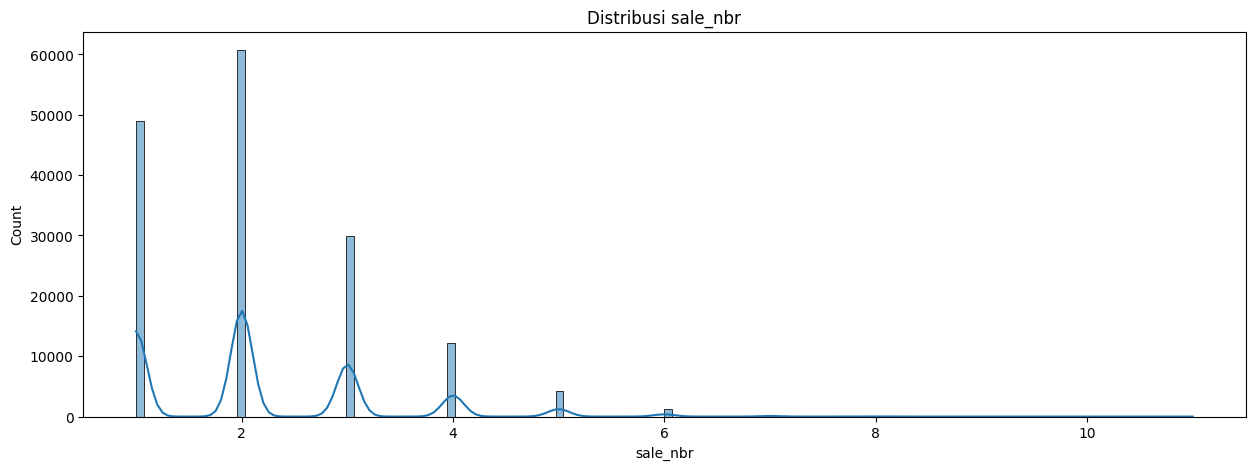

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

sns.histplot(data['sale_nbr'], kde=True)
plt.title('Distribusi sale_nbr')
plt.show()

- uji normalitas

In [10]:
import scipy.stats as stats

data_sample = data['sale_nbr'].dropna().sample(2000, random_state=42)

stat, p = stats.shapiro(data_sample)
print(f'Shapiro-Wilk p-value: {p}')

if p > 0.05:
    print('sale_nbr normal')
else:
    print('sale_nbr tidak normal')


Shapiro-Wilk p-value: 9.49659641746521e-41
sale_nbr tidak normal


### Outlier

In [11]:
from re import U
q1 = data['sale_nbr'].quantile(0.25)
q3 = data['sale_nbr'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

min_value = data['sale_nbr'].min()
max_value = data['sale_nbr'].max()

print(f'Nilai minimum: {min_value}')
print(f'lower bound: {lower_bound}')
print(f'Nilai maksimum: {max_value}')
print(f'upper bound: {upper_bound}')

outliers = data[(data['sale_nbr'] < lower_bound) | (data['sale_nbr'] > upper_bound)]
len(outliers['sale_nbr'])

Nilai minimum: 1.0
lower bound: -2.0
Nilai maksimum: 11.0
upper bound: 6.0


448

### cek korelasi

In [12]:
data.select_dtypes(include='number').corr(method='spearman')['sale_nbr'].sort_values(ascending=False).head(5)

,sale_nbr
sale_nbr,1.000000
sale_price,0.370521
bath_full,0.052455
year_reno,0.050543
longitude,0.044802


### Imputasi

In [13]:
data['sale_nbr'] = data.groupby('sale_price')['sale_nbr'].transform(lambda x: x.fillna(x.median()))
data.isna().sum().sort_values(ascending=False).head(5)

,0
subdivision,17550
sale_nbr,4470
submarket,1717
sale_price,0
sale_warning,0


In [14]:
data['sale_nbr'] = data['sale_nbr'].fillna(data['sale_nbr'].median())
data.isna().sum().sort_values(ascending=False).head(5)


,0
subdivision,17550
submarket,1717
sale_date,0
sale_nbr,0
sale_warning,0


## Cleaning subdivision

### korelasi

- subdivision dan city

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Buat tabel kontingensi
table = pd.crosstab(data['subdivision'], data['city'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(table)

# Cramér’s V
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

ha = "subdivision dan city memiliki korelasi"
ho = "subdivision dan city tidak memiliki korelasi"

if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér's V = {cramers_v:.4f}")


subdivision dan city memiliki korelasi
Chi2 = 6957069.89, p = 0.0000
Cramér's V = 0.9764


- subdivision dan zoning

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Buat tabel kontingensi
table = pd.crosstab(data['subdivision'], data['zoning'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(table)

# Cramér’s V
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

ha = "subdivision dan zoning memiliki korelasi"
ho = "subdivision dan zoning tidak memiliki korelasi"

if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér's V = {cramers_v:.4f}")


subdivision dan zoning memiliki korelasi
Chi2 = 39332698.93, p = 0.0000
Cramér's V = 0.6929


### imputasi

In [17]:
data['subdivision'] = data.groupby('city')['subdivision'].transform(lambda x: x.fillna(x.mode()[0]))
data.isna().sum().sort_values(ascending=False).head(5)

,0
submarket,1717
sale_date,0
id,0
sale_nbr,0
sale_warning,0


## Cleaning submarket

### Korelasi

- submarket dan city

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Buat tabel kontingensi
table = pd.crosstab(data['submarket'], data['city'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(table)

# Cramér’s V
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

ha = "submarket dan city memiliki korelasi"
ho = "submarket dan city tidak memiliki korelasi"

if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér's V = {cramers_v:.4f}")


submarket dan city memiliki korelasi
Chi2 = 1696637.87, p = 0.0000
Cramér's V = 0.6895


- submarket dan zoning

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Buat tabel kontingensi
table = pd.crosstab(data['submarket'], data['zoning'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(table)

# Cramér’s V
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

ha = "submarket dan zoning memiliki korelasi"
ho = "submarket dan zoning tidak memiliki korelasi"

if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér's V = {cramers_v:.4f}")

submarket dan zoning memiliki korelasi
Chi2 = 1404054.54, p = 0.0000
Cramér's V = 0.6272


- submarket dan subdivision

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Buat tabel kontingensi
table = pd.crosstab(data['submarket'], data['subdivision'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(table)

# Cramér’s V
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

ha = "submarket dan subdivision memiliki korelasi"
ho = "submarket dan subdivision tidak memiliki korelasi"

if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér's V = {cramers_v:.4f}")

submarket dan subdivision memiliki korelasi
Chi2 = 3241844.29, p = 0.0000
Cramér's V = 0.9531


### Imputasi

In [21]:
data['submarket'] = data.groupby('subdivision')['submarket'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
data.isna().sum().sort_values(ascending=False).head(5)

,0
submarket,461
sale_date,0
id,0
sale_nbr,0
sale_warning,0


In [22]:
data['submarket'] = data.groupby('city')['submarket'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
data.isna().sum().sort_values(ascending=False).head(5)

,0
id,0
sale_date,0
sale_price,0
sale_nbr,0
sale_warning,0


# SAVE DATA_TRAIN

In [23]:
data.to_csv('data_train.csv', index=False)

# EDA

## distribusi

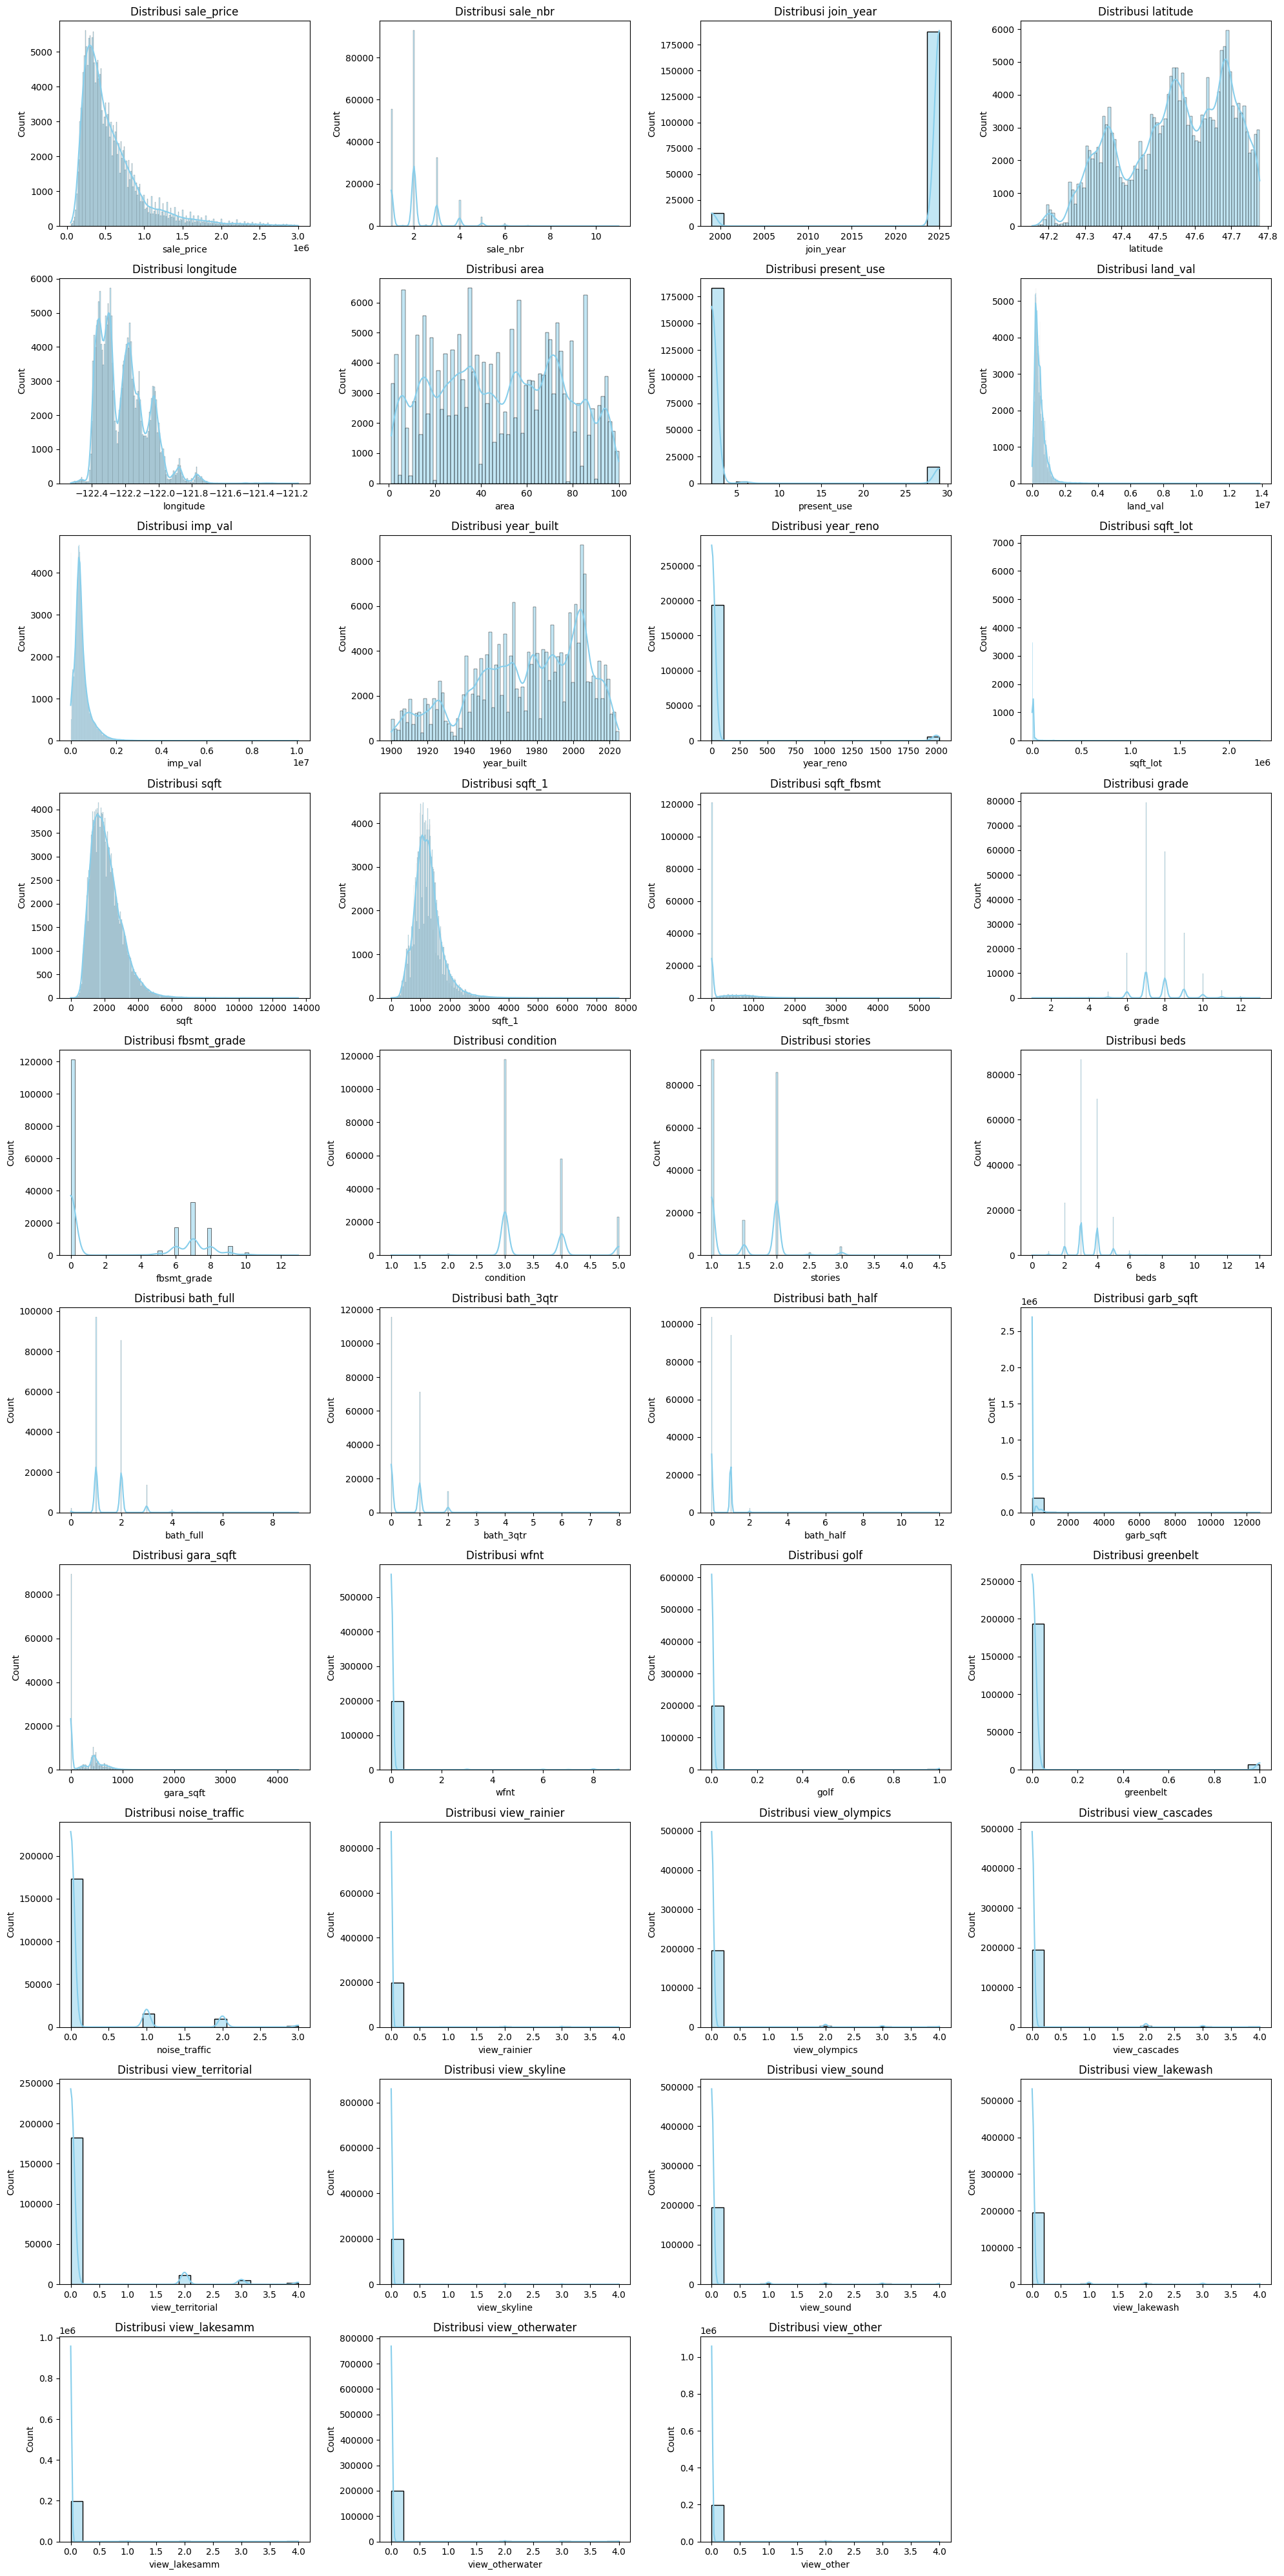

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['sale_price', 'sale_nbr', 'join_year', 'latitude', 'longitude',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other']

# Plot distribusi dan outlier
plt.figure(figsize=(20, 40))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')


plt.tight_layout()
plt.show()

## Outlier

In [25]:
data_o = data[cols]

def check_outlier(df, data_o):
    hasil_outlier = {}
    for col in data_o:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        hasil_outlier[col] = {
            'jumlah_outliers' : outliers.shape[0],
            'Persentase Outlier': (outliers.shape[0] / df.shape[0]) * 100
        }
    return pd.DataFrame(hasil_outlier).T
check_outlier(data, data_o).sort_values(by='Persentase Outlier', ascending=False)

,jumlah_outliers,Persentase Outlier
garb_sqft,41972.0,20.9860
noise_traffic,26924.0,13.4620
sqft_lot,21097.0,10.5485
view_territorial,17512.0,8.7560
present_use,16847.0,8.4235
grade,16560.0,8.2800
imp_val,13931.0,6.9655
join_year,12280.0,6.1400
sale_price,11736.0,5.8680
land_val,7486.0,3.7430


## Korelasi

In [26]:
data_o.corr()['sale_price'].sort_values(ascending=False)

,sale_price
sale_price,1.000000
sqft,0.466253
grade,0.464287
imp_val,0.455197
land_val,0.412339
sqft_1,0.304217
sale_nbr,0.289902
latitude,0.272874
view_territorial,0.235627
bath_full,0.226203


## Linearitas

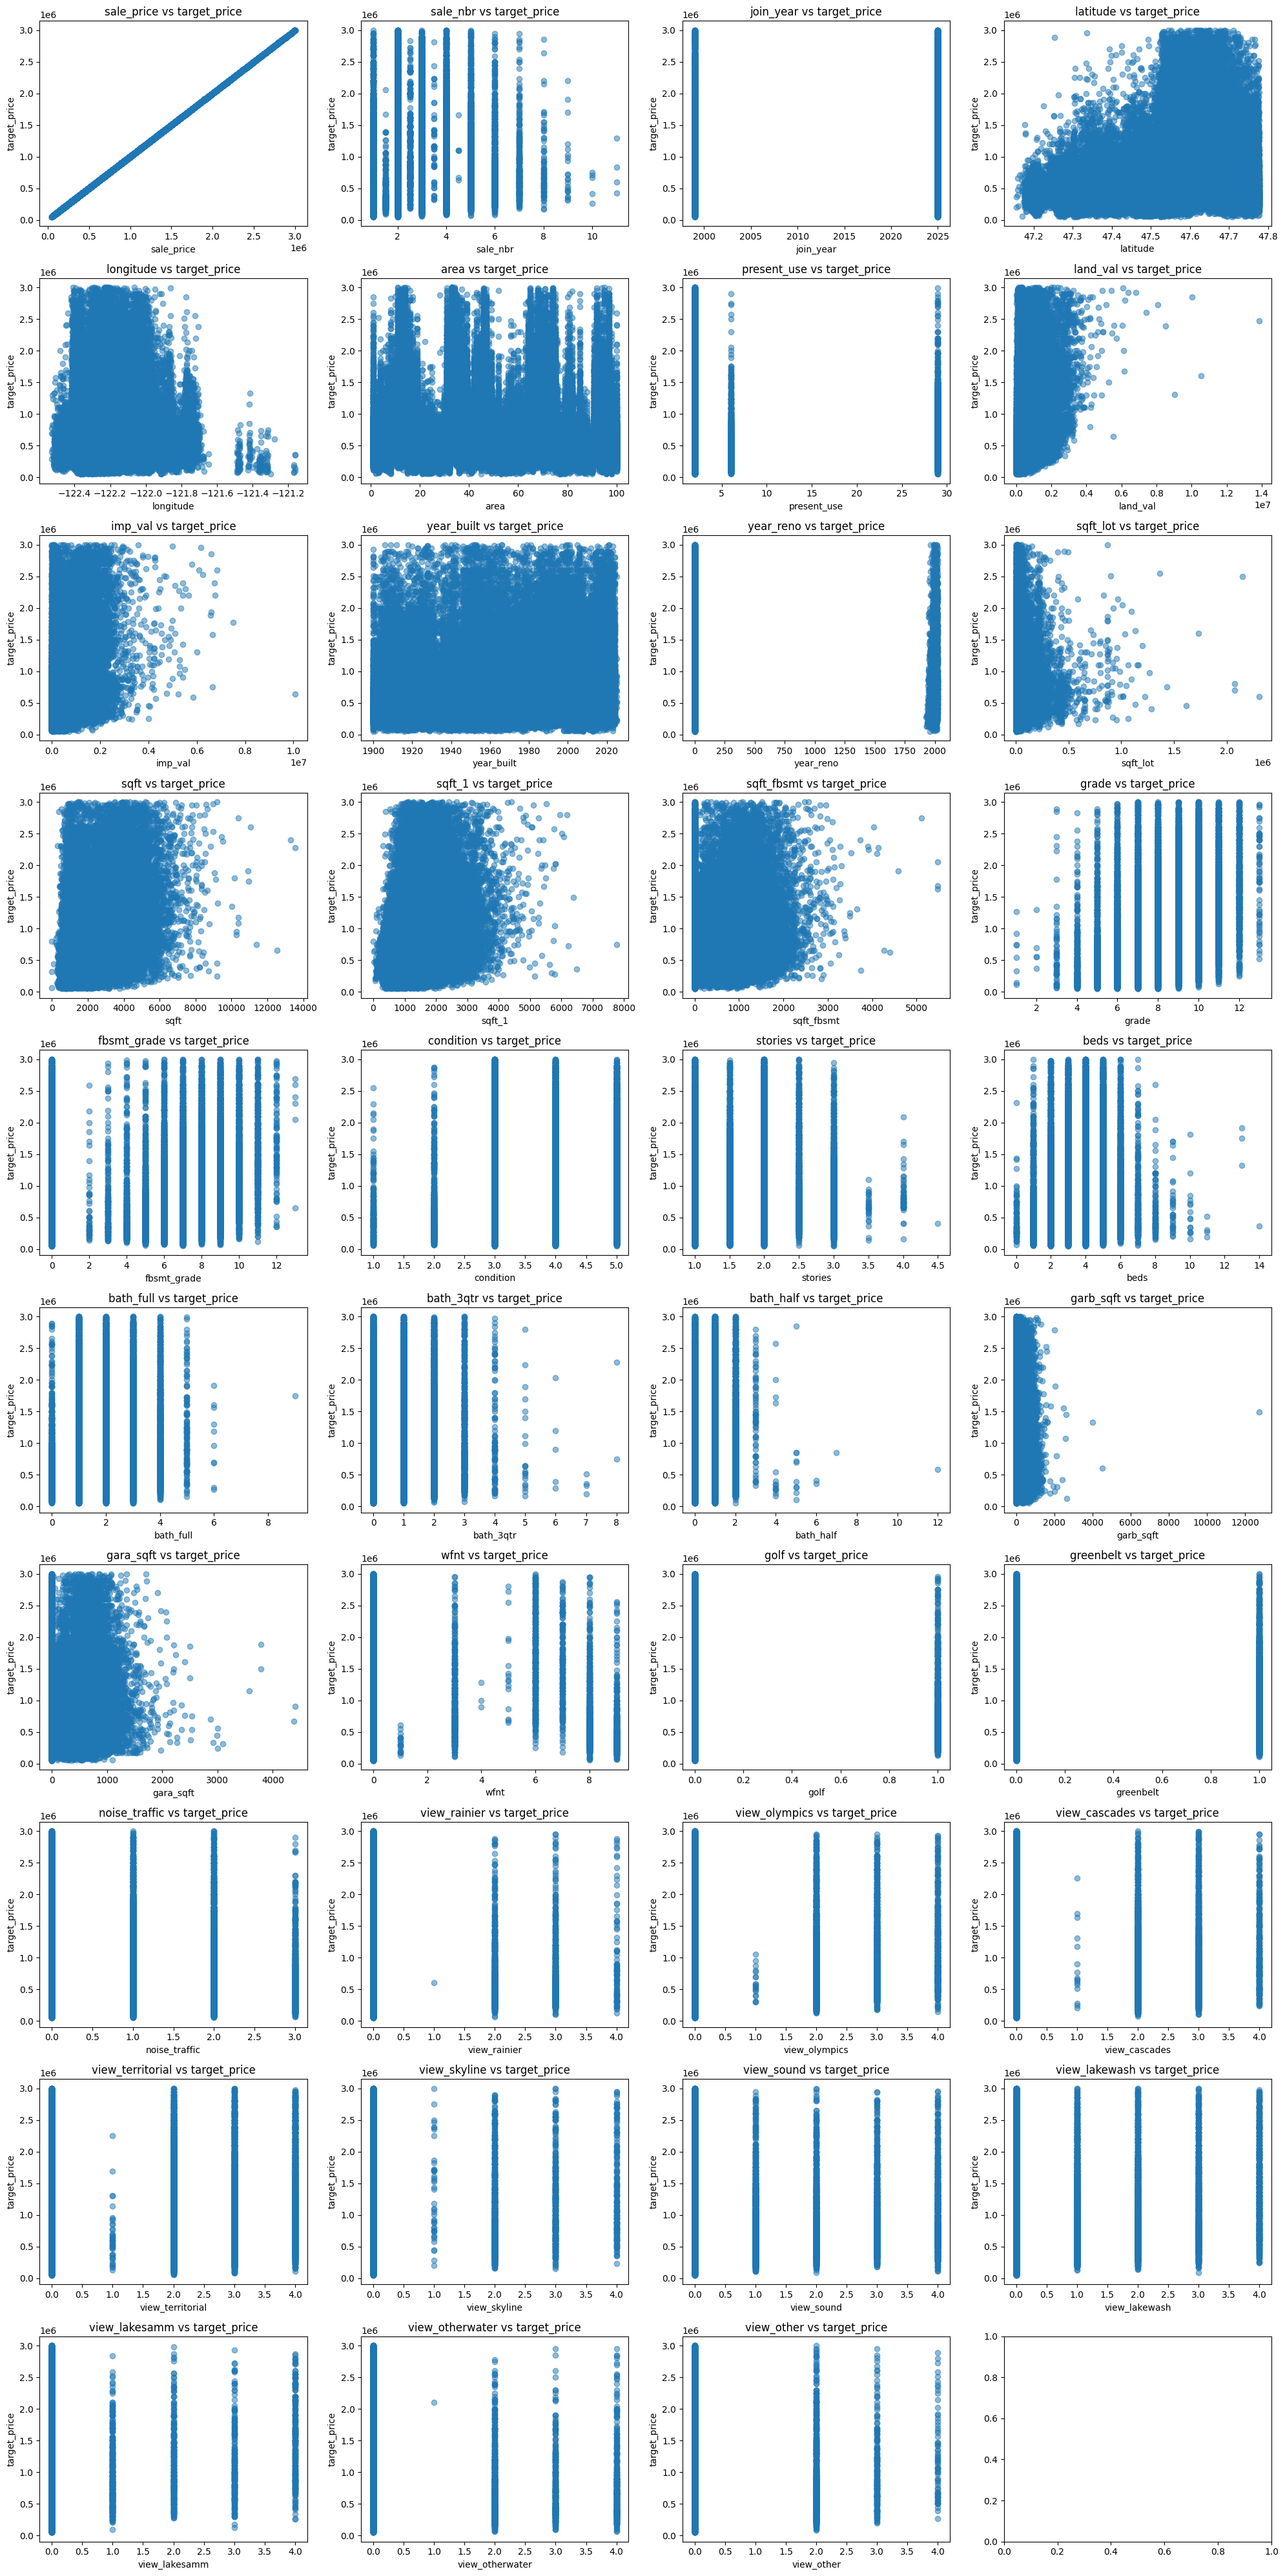

In [27]:
import matplotlib.pyplot as plt


# Visualisasi scatter plot tiap fitur vs target dalam grid 2x3
fig, axs = plt.subplots(10, 4, figsize=(20, 40))
axs = axs.flatten()

data_lin = ['sale_price', 'sale_nbr', 'join_year', 'latitude', 'longitude',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other']

target = data['sale_price']


for i, feat in enumerate(data_lin):
    axs[i].scatter(data[feat], target, alpha=0.5)
    axs[i].set_xlabel(feat)
    axs[i].set_ylabel('target_price')
    axs[i].set_title(f'{feat} vs target_price')

plt.tight_layout()
plt.show()


# Machine Learning


## Preparation

###clustering latitude dan longtidude

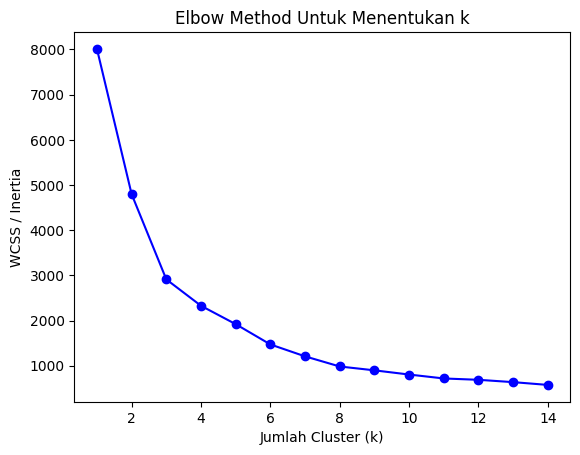

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['latitude', 'longitude']])
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method Untuk Menentukan k')
plt.show()


In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
data['lokasi_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])
data['lokasi_cluster']

,lokasi_cluster
0,0
1,1
2,0
3,2
4,3
...,...
199995,3
199996,3
199997,1
199998,3


### ubah tanggal ke tahun

In [30]:
data['sale_date'] = pd.to_datetime(data['sale_date'])
data['sale_year'] = data['sale_date'].dt.year
data['sale_year']

,sale_year
0,2014
1,1999
2,2006
3,1999
4,2018
...,...
199995,2000
199996,2019
199997,2018
199998,2018


## split data

In [31]:
from sklearn.model_selection import train_test_split

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other']]

y = data['sale_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)






## Modeling

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

## Evaluasi

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

Random Forest Results:
MSE     : 17107359887.1599
RMSE    : 130795.1065
MAE     : 69694.5576
R-Square: 90.1818%


RMSE = rata-rata selisih antara prediksi dan nilai aktual (dalam satuan kuadrat) $130.795

MAE = rata rata selisih mutlak antara harga prediksi dan harga aktual : $69.694 dolar

R-square = variasi harga rumah bisa dijelaskan oleh fitur-fitur yang digunakan dalam model : 90%

## Analisis Residual

- distribusi

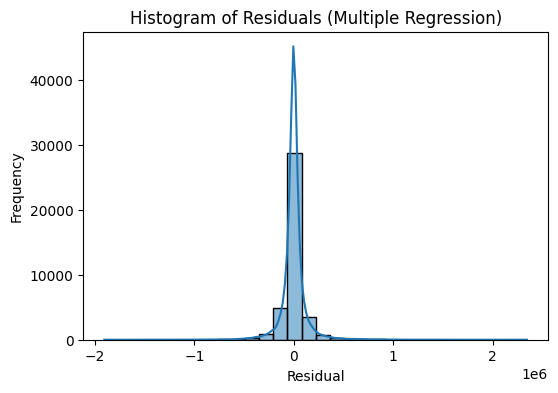

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals (Multiple Regression)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

- Uji normalitas

In [35]:
from scipy.stats import shapiro

r_sample = residuals.sample(5000)

stat, p = shapiro(r_sample)
if p > 0.05:
    print(f'Residual memiliki distribusi normal (p={p:.3f})')
else:
    print(f'Residual tidak memiliki distribusi normal (p={p:.3f})')

print(f'Statistik: {stat}, p-value: {p}')

Residual tidak memiliki distribusi normal (p=0.000)
Statistik: 0.7410507515236765, p-value: 1.440809257986503e-66


-  Residual vs Fitted Plot

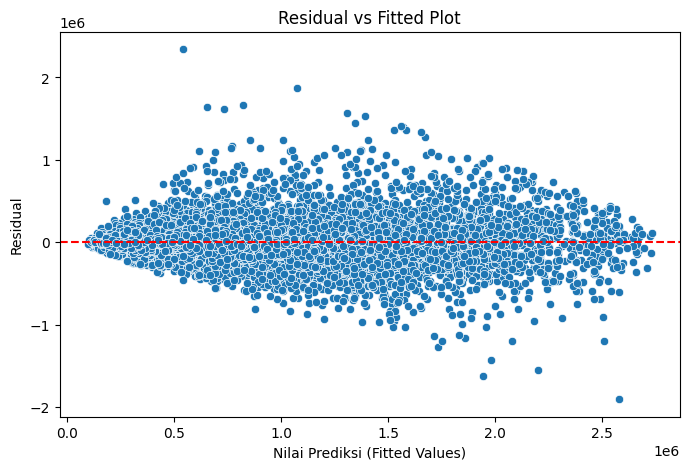

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Nilai Prediksi (Fitted Values)")
plt.ylabel("Residual")
plt.title("Residual vs Fitted Plot")
plt.show()



## VIF

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other']]  # dataframe hanya berisi fitur (tanpa target)


# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


             Feature           VIF
0          sale_year  60279.640674
1           sale_nbr      6.509667
2          join_year  64648.666900
3     lokasi_cluster      3.275719
4               area      5.173958
5        present_use      2.727262
6           land_val      4.520214
7            imp_val     10.343212
8         year_built  12698.000984
9          year_reno      1.198957
10          sqft_lot      1.284695
11              sqft     95.899775
12            sqft_1     48.795729
13        sqft_fbsmt     10.125268
14             grade    173.765075
15       fbsmt_grade      8.674063
16         condition     36.052655
17           stories     57.414872
18              beds     30.051081
19         bath_full     19.375846
20         bath_3qtr      3.621654
21         bath_half      3.253941
22         garb_sqft      2.006964
23         gara_sqft      5.091064
24              wfnt      2.011123
25              golf      1.031843
26         greenbelt      1.094536
27     noise_traffic

# re preparation

## Feature engineering

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
data['lokasi_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])


In [39]:
data['sale_date'] = pd.to_datetime(data['sale_date'])
data['sale_year'] = data['sale_date'].dt.year

In [40]:
data['house_age'] = data['sale_year'] - data['year_built'] # ini umur rumah
data['age_reno'] = data['sale_year'] - data['year_reno'] # ini umur renovasi
data['sqft_above_ground'] = data['sqft'] - data['sqft_fbsmt'] #Menghitung luas bangunan di atas tanah (bukan basement)
data['basement_ratio'] = data['sqft_fbsmt'] / (data['sqft'] + 1e-5) #Menghitung proporsi basement terhadap total luas rumah
data['total_bath'] = data['bath_full'] + 0.75 * data['bath_3qtr'] + 0.5 * data['bath_half'] #Menggabungkan berbagai jenis kamar mandi menjadi satu skor angka kontinu
data['bed_per_bath'] = data['beds'] / (data['total_bath'] + 1e-5) #rasio jumlah kamar tidur per kamar mandi. dan 1e-5 untuk untuk mencegah pembagian nol

# Re Modeling

## split data

In [41]:
from sklearn.model_selection import train_test_split

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath']]

y = data['sale_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

Random Forest Results:
MSE     : 16362503317.6818
RMSE    : 127916.0010
MAE     : 68788.6767
R-Square: 90.6093%


## XGBoost Regressor

In [44]:
import xgboost as xgb
# XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(x_train, y_train)

# Prediksi
y_pred_xgb = xgbr.predict(x_test)

#evaluasi
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)
r_squared = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results:
MSE     : 15070568448.0000
RMSE    : 122762.2436
MAE     : 69603.4141
R-Square: 91.3508%


## cek pengaruh fitur ke model

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame untuk melihat pentingnya fitur
importances = rf.feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'Fitur': features, 'Importance': importances})

# Urutkan dari yang paling penting
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Tampilkan fitur yang nilainya sangat kecil
print("\nFitur yang memengaruhi model:")
print(importance_df[importance_df['Importance'] > 0.005])
print("\nFitur yang tidak terlalu memengaruhi model:")
print(importance_df[importance_df['Importance'] < 0.005])



Fitur yang memengaruhi model:
                Fitur  Importance
0           sale_year    0.330897
7             imp_val    0.203348
6            land_val    0.184308
14              grade    0.102351
2           join_year    0.039091
38          house_age    0.020684
11               sqft    0.016593
3      lokasi_cluster    0.014609
10           sqft_lot    0.011240
39           age_reno    0.009880
4                area    0.009515
8          year_built    0.007631
40  sqft_above_ground    0.006402
12             sqft_1    0.006148

Fitur yang tidak terlalu memengaruhi model:
               Fitur  Importance
1           sale_nbr    0.004587
43      bed_per_bath    0.004091
23         gara_sqft    0.003563
42        total_bath    0.002591
41    basement_ratio    0.002145
13        sqft_fbsmt    0.002043
16         condition    0.001791
22         garb_sqft    0.001530
34     view_lakewash    0.001417
18              beds    0.001413
31  view_territorial    0.001335
15       fbsmt_gra

## respilt

In [46]:
from sklearn.model_selection import train_test_split

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area',  'land_val', 'imp_val', 'year_built',
       'sqft_lot', 'sqft', 'sqft_1', 'grade',
      'house_age','age_reno','sqft_above_ground']]

y = data['sale_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

Random Forest Results:
MSE     : 16461239272.6926
RMSE    : 128301.3611
MAE     : 68805.4628
R-Square: 90.5527%


Best parameters found:
RandomForestRegressor(max_depth=20, max_features=None, n_estimators=200,
                      random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

Random Forest Results:
MSE     : 16359468284.8995
RMSE    : 127904.1371
MAE     : 68611.6132
R-Square: 90.6111%


## DecisionTreeRegressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

ds = DecisionTreeRegressor(random_state=42)
ds.fit(x_train, y_train)
y_pred = ds.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("DecisionTreeRegressor Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

DecisionTreeRegressor Results:
MSE     : 32880127456.8685
RMSE    : 181328.7828
MAE     : 98223.5804
R-Square: 81.1296%


##  LGBM

In [53]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42, n_estimators=100)
lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] Start training from score 584465.253519


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("LGBM Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results:
MSE     : 15751130963.1962
RMSE    : 125503.5098
MAE     : 71024.4886
R-Square: 90.9602%


In [55]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [3, 5, 7, 10, -1],  # -1 = tidak dibatasi
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
}

lgb_model = lgb.LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=30,  # berapa kombinasi yang diuji
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best parameters found:")
print(random_search.best_estimator_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] Start training from score 584465.253519
Best parameters found:
LGBMRegressor(learning_rate=0.05, n_estimators=800, num_leaves=127,
              random_state=42)


Best parameters found:
LGBMRegressor(learning_rate=0.05, n_estimators=800, random_state=42)

In [56]:
best_parameter_lgbm = random_search.best_estimator_

y_pred = best_parameter_lgbm.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("LGBM Results:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results:
MSE     : 13808532078.7242
RMSE    : 117509.7106
MAE     : 63985.4665
R-Square: 92.0751%


# Re preparation splitdata dan Menangani distribusi target skew positif

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath']]

# Transformasi log(1 + x)
data['log_sale_price'] = np.log1p(data['sale_price'])

y = data['log_sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## LGBM

In [59]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42,learning_rate=0.05, n_estimators=800)
lgbm.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = lgbm.predict(x_train)
y_test_pred_log = lgbm.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3413
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 44
[LightGBM] [Info] Start training from score 13.079080


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("LGBM Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results test:
MSE     : 14120458248.3587
RMSE    : 118829.5344
MAE     : 64315.4009
R-Square: 91.8961%


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("LGBM Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results train:
MSE     : 11315540564.9176
RMSE    : 106374.5297
MAE     : 59775.3441
R-Square: 93.4916%


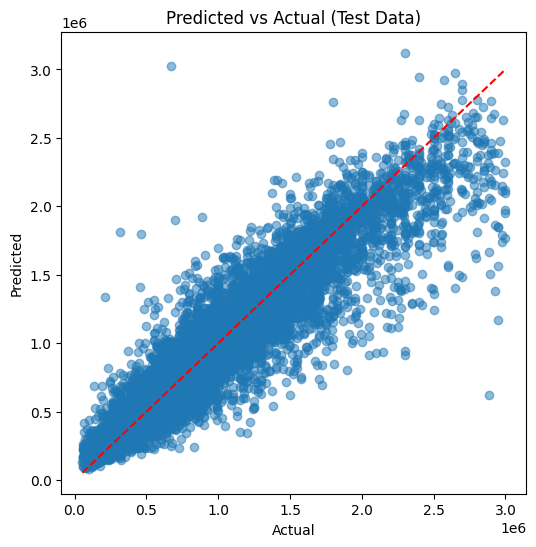

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # garis y=x
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (Test Data)')
plt.show()


## RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = rf.predict(x_train)
y_test_pred_log = rf.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("RandomForestRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results test:
MSE     : 16700615287.8394
RMSE    : 129230.8604
MAE     : 68187.8577
R-Square: 90.4153%


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("RandomForestRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results train:
MSE     : 2733630534.1196
RMSE    : 52284.1327
MAE     : 25869.7034
R-Square: 98.4277%


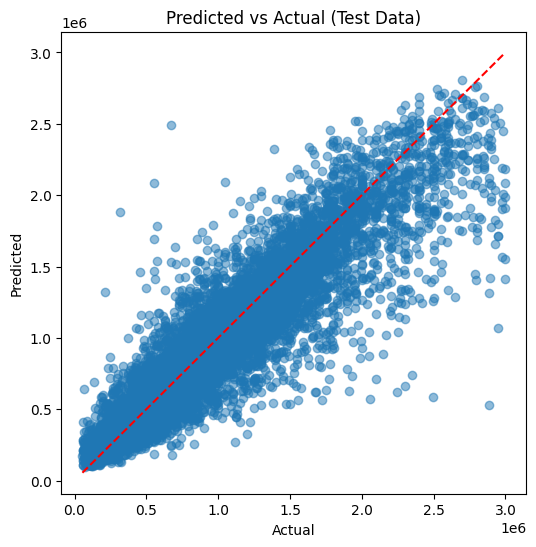

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # garis y=x
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (Test Data)')
plt.show()

## XG-BOOST

In [67]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Buat model XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Tentukan distribusi parameter yang mau dicari
param_dist = {
    'max_depth': randint(3, 10),           # kedalaman pohon antara 3-10
    'learning_rate': uniform(0.01, 0.3),  # learning rate antara 0.01-0.31
    'n_estimators': randint(100, 500),    # jumlah pohon 100-500
    'subsample': uniform(0.6, 0.4),       # subsample antara 0.6-1.0
    'colsample_bytree': uniform(0.6, 0.4),# fitur sample 0.6-1.0
    'min_child_weight': randint(1, 10)    # minimal child weight 1-10
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,               # coba 50 kombinasi parameter acak
    cv=3,                    # 3-fold cross validation
    scoring='neg_mean_squared_error',  # metric evaluasi
    random_state=42,
    n_jobs=-1                # pakai semua core CPU
)

# Fit ke data train
random_search.fit(x_train, y_train)

# Lihat hasil terbaik
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'colsample_bytree': np.float64(0.9046478461314871), 'learning_rate': np.float64(0.0812912631977199), 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 379, 'subsample': np.float64(0.7881202537784153)}
Best score: -0.0244083338649609


In [68]:
import xgboost as xgb
# XGBoost Regressor
xgbr = xgb.XGBRegressor(
    colsample_bytree=0.9046478461314871,
    learning_rate=0.0812912631977199,
    max_depth=9,
    min_child_weight=6,
    n_estimators=379,
    subsample=0.7881202537784153,
    objective='reg:squarederror',  # buat regresi
    random_state=42
)

xgbr.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = xgbr.predict(x_train)
y_test_pred_log = xgbr.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("XGBoost Regressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results test:
MSE     : 13493254081.6575
RMSE    : 116160.4669
MAE     : 61887.3294
R-Square: 92.2560%


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("XGBoost Regressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results train:
MSE     : 5481603233.9265
RMSE    : 74037.8500
MAE     : 44281.2060
R-Square: 96.8471%


## split data dengan fitur yg memiliki pengaruh pada model

In [71]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area',  'land_val', 'imp_val', 'year_built',
       'sqft_lot', 'sqft', 'sqft_1', 'grade',
      'house_age','age_reno','sqft_above_ground']]

# Transformasi log(1 + x)
data['log_sale_price'] = np.log1p(data['sale_price'])

y = data['log_sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42,learning_rate=0.05, n_estimators=800)
lgbm.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = lgbm.predict(x_train)
y_test_pred_log = lgbm.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] Start training from score 13.079080


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("LGBM Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results test:
MSE     : 14468335406.4902
RMSE    : 120284.3939
MAE     : 65247.2870
R-Square: 91.6964%


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("LGBM Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results test:
MSE     : 14468335406.4902
RMSE    : 120284.3939
MAE     : 65247.2870
R-Square: 91.6964%


# Encoding

In [75]:
data.select_dtypes(include='object').columns

Index(['sale_warning', 'join_status', 'city', 'zoning', 'subdivision',
       'submarket'],
      dtype='object')

In [76]:
dataq = data[['sale_warning', 'join_status', 'city', 'zoning',
       'subdivision', 'submarket']]


In [77]:
dataq.nunique().sort_values(ascending=True)

,0
join_status,8
submarket,19
city,41
sale_warning,142
zoning,500
subdivision,10376


## join_status

In [78]:
dataq['join_status'].value_counts()

,count
join_status,
nochg,126281
new,53085
reno - before,5864
rebuilt - before,3706
rebuilt - after,3095
demo,2869
reno - after,2632
miss99,2468


In [79]:
from sklearn.preprocessing import OneHotEncoder

onehot_join = dataq[['join_status']]

# panggil onehot encoder
encoder = OneHotEncoder(drop = 'first') # INI WAJIB

# training ke x
encoder.fit(onehot_join) # encoder nya berdasarkan hasil train

# dan transformasikan (terapkan encoder) ke onehot_join
encoded = encoder.transform(onehot_join)
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 197131 stored elements and shape (200000, 7)>

In [80]:
encoded_data = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())

In [81]:
data = pd.concat([data, encoded_data], axis=1)

In [82]:
data[['join_status_miss99','join_status_new','join_status_nochg','join_status_rebuilt - after','join_status_rebuilt - before','join_status_reno - after','join_status_reno - before']]

,join_status_miss99,join_status_new,join_status_nochg,join_status_rebuilt - after,join_status_rebuilt - before,join_status_reno - after,join_status_reno - before
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
199995,0.0,0.0,1.0,0.0,0.0,0.0,0.0
199996,0.0,1.0,0.0,0.0,0.0,0.0,0.0
199997,0.0,1.0,0.0,0.0,0.0,0.0,0.0
199998,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## submarket

In [83]:
dataq['submarket'].value_counts()

,count
submarket,
K,21185
B,16289
I,15842
R,14404
Q,14005
O,12528
D,12404
F,12401
M,10797


In [84]:
map = [
    {
        'col': 'submarket',
        'mapping': {
            'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
            'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
            'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19
        }
    }
]


In [85]:
!pip install category_encoders

In [86]:
import category_encoders as ce

ordinal_submarket = dataq[['submarket']]

# memanggil encoder
encoder = ce.OrdinalEncoder(mapping = map, cols = ['submarket'])

# training ke x
encoder.fit(ordinal_submarket) # encoder nya berdasarkan hasil train

# dan transformasikan (terapkan encoder) ke ordinal_submarket
encoded = encoder.transform(ordinal_submarket).astype(int)
encoded['submarket_encoded'] = encoded['submarket'].astype(int)
encoded['submarket_encoded']

,submarket_encoded
0,9
1,17
2,11
3,7
4,16
...,...
199995,15
199996,16
199997,2
199998,15


In [87]:
data = pd.concat([data, encoded['submarket_encoded']], axis=1)

In [88]:
data

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,bed_per_bath,log_sale_price,join_status_miss99,join_status_new,join_status_nochg,join_status_rebuilt - after,join_status_rebuilt - before,join_status_reno - after,join_status_reno - before,submarket_encoded
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,1.714276,12.371591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9
1,1,1999-01-15,313300,1.0,26,nochg,2025,47.6531,-122.1996,74,...,1.333327,12.654920,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,1.199995,12.739641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,1.599994,12.495008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,1.230765,14.316286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2000-08-15,277500,1.0,,nochg,2025,47.5503,-122.0285,69,...,1.714276,12.533580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
199996,199996,2019-07-15,1296000,2.0,,new,2025,47.6789,-122.1164,72,...,1.599994,14.074794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16
199997,199997,2018-06-15,845000,2.0,,new,2025,47.6939,-122.3542,6,...,1.714276,13.647093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
199998,199998,2018-06-15,890000,2.0,,nochg,2025,47.6433,-122.0613,35,...,1.199995,13.698978,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15


## city

In [89]:
dataq['city'].value_counts()

,count
city,
SEATTLE,59001
KING COUNTY,27127
BELLEVUE,10691
SAMMAMISH,9563
KENT,9429
RENTON,9368
KIRKLAND,8563
FEDERAL WAY,7616
AUBURN,6249


In [90]:
import category_encoders as ce

binary_city = dataq[['city']]

# memanggil encoder
encoder = ce.BinaryEncoder()

# training ke binary_city
encoder.fit(binary_city) # encoder nya berdasarkan hasil train

# dan transformasikan (terapkan encoder) ke binary_city
encoded = encoder.transform(binary_city)
encoded

,city_0,city_1,city_2,city_3,city_4,city_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
199995,0,0,1,0,1,1
199996,0,1,0,0,0,0
199997,0,0,0,1,1,0
199998,0,0,1,0,0,0


In [91]:
data = pd.concat([data, encoded[['city_0',	'city_1',	'city_2',	'city_3',	'city_4',	'city_5']]], axis=1)

In [92]:
data

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,join_status_rebuilt - before,join_status_reno - after,join_status_reno - before,submarket_encoded,city_0,city_1,city_2,city_3,city_4,city_5
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0.0,0.0,0.0,9,0,0,0,0,0,1
1,1,1999-01-15,313300,1.0,26,nochg,2025,47.6531,-122.1996,74,...,0.0,0.0,0.0,17,0,0,0,0,1,0
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0.0,0.0,0.0,11,0,0,0,0,1,1
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0.0,0.0,0.0,7,0,0,0,1,0,0
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0.0,0.0,0.0,16,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2000-08-15,277500,1.0,,nochg,2025,47.5503,-122.0285,69,...,0.0,0.0,0.0,15,0,0,1,0,1,1
199996,199996,2019-07-15,1296000,2.0,,new,2025,47.6789,-122.1164,72,...,0.0,0.0,0.0,16,0,1,0,0,0,0
199997,199997,2018-06-15,845000,2.0,,new,2025,47.6939,-122.3542,6,...,0.0,0.0,0.0,2,0,0,0,1,1,0
199998,199998,2018-06-15,890000,2.0,,nochg,2025,47.6433,-122.0613,35,...,0.0,0.0,0.0,15,0,0,1,0,0,0


# Final

## split data menggunakan log-transform

In [93]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status_miss99','join_status_new','join_status_nochg','join_status_rebuilt - after','join_status_rebuilt - before','join_status_reno - after','join_status_reno - before',
       'submarket_encoded','city_0',	'city_1',	'city_2',	'city_3',	'city_4',	'city_5']]

# Transformasi log(1 + x)
data['log_sale_price'] = np.log1p(data['sale_price'])

y = data['log_sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## modeling

### RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = rf.predict(x_train)
y_test_pred_log = rf.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("RandomForestRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results test:
MSE     : 15166959707.0683
RMSE    : 123154.2111
MAE     : 65946.5943
R-Square: 91.2955%


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("RandomForestRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results train:
MSE     : 2416092543.5323
RMSE    : 49153.7643
MAE     : 24840.1233
R-Square: 98.6103%


### LGBM

In [97]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42,learning_rate=0.05, n_estimators=800)
lgbm.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = lgbm.predict(x_train)
y_test_pred_log = lgbm.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 58
[LightGBM] [Info] Start training from score 13.079080


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("LGBM Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results test:
MSE     : 12742412565.7288
RMSE    : 112882.2952
MAE     : 61930.4155
R-Square: 92.6869%


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("LGBM Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

LGBM Results train:
MSE     : 9887084577.8007
RMSE    : 99433.8201
MAE     : 57305.4397
R-Square: 94.3132%


### XG-BOOST

In [100]:
import xgboost as xgb
# XGBoost Regressor
xgbr = xgb.XGBRegressor(
    colsample_bytree=0.9046478461314871,
    learning_rate=0.0812912631977199,
    max_depth=9,
    min_child_weight=6,
    n_estimators=379,
    subsample=0.7881202537784153,
    objective='reg:squarederror',  # buat regresi
    random_state=42
)

xgbr.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = xgbr.predict(x_train)
y_test_pred_log = xgbr.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("XGBoost Regressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results test:
MSE     : 12312179332.9842
RMSE    : 110960.2602
MAE     : 59920.4955
R-Square: 92.9339%


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)

print("XGBoost Regressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results train:
MSE     : 4904667423.2170
RMSE    : 70033.3308
MAE     : 42917.8484
R-Square: 97.1790%


### DecisionTreeRegressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

ds = DecisionTreeRegressor(random_state=42)
ds.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred_log = ds.predict(x_train)
y_test_pred_log = ds.predict(x_test)

# transform ke skala asli
y_train_actual = np.expm1(y_train)
y_train_pred = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r_squared = r2_score(y_test_actual, y_test_pred)

print("DecisionTreeRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

DecisionTreeRegressor Results test:
MSE     : 28840343914.1919
RMSE    : 169824.4503
MAE     : 94514.5166
R-Square: 83.4481%


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_train_actual, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, y_train_pred)
r_squared = r2_score(y_train_actual, y_train_pred)


print("DecisionTreeRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

DecisionTreeRegressor Results train:
MSE     : 905880.5848
RMSE    : 951.7776
MAE     : 24.2486
R-Square: 99.9995%


## split data tanpa log-transform

In [106]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status_miss99','join_status_new','join_status_nochg','join_status_rebuilt - after','join_status_rebuilt - before','join_status_reno - after','join_status_reno - before',
       'submarket_encoded','city_0',	'city_1',	'city_2',	'city_3',	'city_4',	'city_5']]

y = data['sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## modeling

### RandomForestRegressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

# Prediksi (skala log)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("RandomForestRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("RandomForestRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results test:
MSE     : 14727267759.3317
RMSE    : 121355.9548
MAE     : 65884.9027
R-Square: 91.5478%
RandomForestRegressor Results train:
MSE     : 1992685426.2721
RMSE    : 44639.5052
MAE     : 24433.5453
R-Square: 98.8539%


### LGBM

In [108]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lgbm = lgb.LGBMRegressor(random_state=42,learning_rate=0.05, n_estimators=800)
lgbm.fit(x_train, y_train)

y_train_pred = lgbm.predict(x_train)
y_test_pred = lgbm.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("lightgbm Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("lightgbm Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 58
[LightGBM] [Info] Start training from score 584465.253519
lightgbm Results test:
MSE     : 12382332330.1870
RMSE    : 111275.9288
MAE     : 62744.6714
R-Square: 92.8936%
lightgbm Results train:
MSE     : 8427368684.7706
RMSE    : 91800.7009
MAE     : 56763.2998
R-Square: 95.1528%


### XG-BOOST

In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# XGBoost Regressor
xgbr = xgb.XGBRegressor(
    colsample_bytree=0.9046478461314871,
    learning_rate=0.0812912631977199,
    max_depth=9,
    min_child_weight=6,
    n_estimators=379,
    subsample=0.7881202537784153,
    objective='reg:squarederror',  # buat regresi
    random_state=42
)

xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
y_test_pred = xgbr.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("XGBoost Regressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("XGBoost Regressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

XGBoost Regressor Results test:
MSE     : 12249345024.0000
RMSE    : 110676.7592
MAE     : 60765.9727
R-Square: 92.9699%
XGBoost Regressor Results train:
MSE     : 4053832960.0000
RMSE    : 63669.7178
MAE     : 42274.1758
R-Square: 97.6683%


### DecisionTreeRegressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ds = DecisionTreeRegressor(random_state=42)
ds.fit(x_train, y_train)

y_train_pred = ds.predict(x_train)
y_test_pred = ds.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("DecisionTreeRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("DecisionTreeRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

DecisionTreeRegressor Results test:
MSE     : 29353433962.2424
RMSE    : 171328.4389
MAE     : 94916.7478
R-Square: 83.1536%
DecisionTreeRegressor Results train:
MSE     : 903571.8367
RMSE    : 950.5640
MAE     : 24.2568
R-Square: 99.9995%


## TUNING PARAMETER

In [111]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status_miss99','join_status_new','join_status_nochg','join_status_rebuilt - after','join_status_rebuilt - before','join_status_reno - after','join_status_reno - before',
       'submarket_encoded','city_0',	'city_1',	'city_2',	'city_3',	'city_4',	'city_5']]

y = data['sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### RandomForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),           # jumlah pohon
    'max_depth': randint(5, 30),                 # kedalaman pohon
    'min_samples_split': randint(2, 20),         # minimal sampel untuk split
    'min_samples_leaf': randint(1, 20),          # minimal sampel pada daun
    'max_features': ['auto', 'sqrt', 'log2'],    # jumlah fitur yang dipakai
    'bootstrap': [True, False]                   # apakah bootstrap digunakan
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,                     # coba 50 kombinasi parameter
    cv=3,                          # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

Best parameters found:
{'bootstrap': True, 'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 144}


### LGBM

In [113]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [3, 5, 7, 10, -1],  # -1 = tidak dibatasi
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
}

lgb_model = lgb.LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,  # berapa kombinasi yang diuji
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 58
[LightGBM] [Info] Start training from score 584465.253519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### XG-BOOST

In [114]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Buat model XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Tentukan distribusi parameter yang mau dicari
param_dist = {
    'max_depth': randint(3, 10),           # kedalaman pohon antara 3-10
    'learning_rate': uniform(0.01, 0.3),  # learning rate antara 0.01-0.31
    'n_estimators': randint(100, 500),    # jumlah pohon 100-500
    'subsample': uniform(0.6, 0.4),       # subsample antara 0.6-1.0
    'colsample_bytree': uniform(0.6, 0.4),# fitur sample 0.6-1.0
    'min_child_weight': randint(1, 10)    # minimal child weight 1-10
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,               # coba 50 kombinasi parameter acak
    cv=3,                    # 3-fold cross validation
    scoring='neg_mean_squared_error',  # metric evaluasi
    random_state=42,
    n_jobs=-1                # pakai semua core CPU
)

# Fit ke data train
random_search.fit(x_train, y_train)


print("Best parameters found:")
print(random_search.best_params_)

Best parameters found:
{'colsample_bytree': np.float64(0.8497416192535173), 'learning_rate': np.float64(0.09869010575131419), 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 383, 'subsample': np.float64(0.9214688307596458)}


### DecisionTreeRegressor

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dt_model = DecisionTreeRegressor(random_state=42)

# Tentukan distribusi parameter yang mau dicari
param_dist = {
    'max_depth': randint(3, 30),               # kedalaman pohon
    'min_samples_split': randint(2, 20),       # minimal sampel untuk split
    'min_samples_leaf': randint(1, 20),        # minimal sampel di daun
    'max_features': ['auto', 'sqrt', 'log2', None]  # jumlah fitur
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=50,                    # jumlah kombinasi acak
    cv=3,                         # cross-validation 3-fold
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit ke data train
random_search.fit(x_train, y_train)

print("Best Parameters:")
print(random_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters:
{'max_depth': 19, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 18}


# best final

## split data

In [116]:
from sklearn.model_selection import train_test_split
import numpy as np

x = data[['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status_miss99','join_status_new','join_status_nochg','join_status_rebuilt - after','join_status_rebuilt - before','join_status_reno - after','join_status_reno - before',
       'submarket_encoded','city_0',	'city_1',	'city_2',	'city_3',	'city_4',	'city_5']]

y = data['sale_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## LGBM

### modeling

In [117]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(num_leaves=63, n_estimators=1000, max_depth=-1, learning_rate=0.05, random_state=42)
lgbm.fit(x_train, y_train)

y_train_pred = lgbm.predict(x_train)
y_test_pred = lgbm.predict(x_test)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 58
[LightGBM] [Info] Start training from score 584465.253519


### evaluasi

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("lightgbm Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("lightgbm Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

lightgbm Results test:
MSE     : 11964547371.2049
RMSE    : 109382.5734
MAE     : 60862.0414
R-Square: 93.1334%
lightgbm Results train:
MSE     : 5624588153.6431
RMSE    : 74997.2543
MAE     : 48582.8724
R-Square: 96.7649%


## xg-boost

### modeling

In [119]:
import xgboost as xgb

# XGBoost Regressor
xgbr = xgb.XGBRegressor(
    colsample_bytree=0.8497416192535173,
    learning_rate=0.09869010575131419,
    max_depth=7,
    min_child_weight=6,
    n_estimators=383,
    subsample=0.9214688307596458,
    objective='reg:squarederror',  # buat regresi
    random_state=42
)

xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
y_test_pred = xgbr.predict(x_test)

### evaluasi

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("xgboost Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("xgboost Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

xgboost Results test:
MSE     : 12219393024.0000
RMSE    : 110541.3634
MAE     : 61552.1797
R-Square: 92.9871%
xgboost Results train:
MSE     : 6479242240.0000
RMSE    : 80493.7404
MAE     : 50843.3242
R-Square: 96.2733%


## RandomForestRegressor

### modeling

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=144,bootstrap=True, max_depth=23, max_features='sqrt', min_samples_leaf=2, min_samples_split=11, random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

### evaluasi

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("RandomForestRegressor Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("RandomForestRegressor Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

RandomForestRegressor Results test:
MSE     : 17146554182.1967
RMSE    : 130944.8517
MAE     : 72499.0452
R-Square: 90.1593%
RandomForestRegressor Results train:
MSE     : 8638359081.5842
RMSE    : 92942.7732
MAE     : 52125.2144
R-Square: 95.0315%


# stacked

In [123]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression



estimators = [
    ('lgbm', lgbm),
    ('xgb', xgbr),
    ('rf', rf)
]

stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacked_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 58
[LightGBM] [Info] Start training from score 584465.253519
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 128000, number of used features: 58
[LightGBM] [Info] Start training from score 584552.931859
[LightGBM] [Warn

StackingRegressor(estimators=[('lgbm',
                               LGBMRegressor(learning_rate=0.05,
                                             n_estimators=1000, num_leaves=63,
                                             random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8497416192535173,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=6,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=383, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('rf',
                               RandomForestRegressor(max_depth=23,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=11,
                                                     n_estimators=144,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [124]:
y_train_pred = stacked_model.predict(x_train)
y_test_pred = stacked_model.predict(x_test)

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

print("Stacking_model Results test:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

print("Stacking_model Results train:")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"R-Square: {r_squared:.4%}")

Stacking_model Results test:
MSE     : 11774683833.8027
RMSE    : 108511.2152
MAE     : 60318.0780
R-Square: 93.2423%
Stacking_model Results train:
MSE     : 5731551973.1913
RMSE    : 75707.0140
MAE     : 48486.0024
R-Square: 96.7034%


# Cleaning data test

In [126]:
import pandas as pd

data_test = pd.read_csv('test.csv')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   id                            200000 non-null  int64         
 1   sale_date                     200000 non-null  datetime64[ns]
 2   sale_price                    200000 non-null  int64         
 3   sale_nbr                      200000 non-null  float64       
 4   sale_warning                  200000 non-null  object        
 5   join_status                   200000 non-null  object        
 6   join_year                     200000 non-null  int64         
 7   latitude                      200000 non-null  float64       
 8   longitude                     200000 non-null  float64       
 9   area                          200000 non-null  int64         
 10  city                          200000 non-null  object        
 11  zoning       

In [128]:
missing_value = data_test.isna().sum().sort_values(ascending=False).reset_index()
missing_value.columns = ['kolom', 'jumlah_missing_value']
missing_value['persentase'] = (missing_value['jumlah_missing_value'] / len(data)) * 100
missing_value.head(5)

,kolom,jumlah_missing_value,persentase
0,sale_nbr,42412,21.206
1,subdivision,17550,8.775
2,submarket,1718,0.859
3,sale_date,0,0.000
4,join_status,0,0.000


## cleaning sale_nbr

- uji korelasi

- kruskal

In [129]:
from scipy.stats import kruskal


groups = [group['sale_nbr'].dropna() for wilayah, group in data_test.groupby('city')]

ha = "city memiliki pengaruh terhadap sale_nbr"
ho = "city tidak memiliki pengaruh terhadap sale_nbr"

stat, p = kruskal(*groups)
if p < 0.05:
    print(f"{ha}")
else:
    print(f"{ho}")

# Hitung epsilon-squared 'seberapa berpengaruh'
k = len(groups)
n = sum(len(group) for group in groups)
epsilon_sq = (stat - k + 1) / (n - k)

print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p: .2e}")
print(f"Epsilon-squared effect size: {epsilon_sq:.4f}")


city memiliki pengaruh terhadap sale_nbr
Kruskal-Wallis H-statistic: 1256.1328778031518, p-value:  2.11e-237
Epsilon-squared effect size: 0.0077


In [130]:
data_test['sale_nbr'] = data_test.groupby('city')['sale_nbr'].transform(lambda x: x.fillna(x.median()))
data_test.isna().sum().sort_values(ascending=False).head(5)


,0
subdivision,17550
submarket,1718
sale_nbr,0
sale_warning,0
join_status,0


## cleaning subdivision

In [131]:
data_test['subdivision'] = data_test.groupby('city')['subdivision'].transform(lambda x: x.fillna(x.mode()[0]))
data_test.isna().sum().sort_values(ascending=False).head(5)

,0
submarket,1718
id,0
sale_nbr,0
sale_warning,0
join_status,0


## cleaning submarket

In [132]:

data_test['submarket'] = data_test.groupby('subdivision')['submarket'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
data_test.isna().sum().sort_values(ascending=False).head(5)

,0
submarket,547
id,0
sale_nbr,0
sale_warning,0
join_status,0


In [133]:
data_test['submarket'] = data_test.groupby('city')['submarket'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
data_test.isna().sum().sort_values(ascending=False).head(5)

,0
id,0
sale_date,0
sale_nbr,0
sale_warning,0
join_status,0


## SAVE DATA_TEST

In [134]:
data_test.to_csv('data_test.csv', index=False)

# pipeline LGBM

In [135]:
from sklearn.cluster import KMeans
import pandas as pd

data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')

data_train['sale_date'] = pd.to_datetime(data_train['sale_date'])
data_train['sale_year'] = data_train['sale_date'].dt.year

data_test['sale_date'] = pd.to_datetime(data_test['sale_date'])
data_test['sale_year'] = data_test['sale_date'].dt.year

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_train[['latitude', 'longitude']])



def add_features(data_train, kmeans):
    data_train = data_train.copy()
    data_train["house_age"] = data_train["sale_year"] - data_train["year_built"]
    data_train["age_reno"] = data_train["sale_year"] - data_train["year_reno"]
    data_train["sqft_above_ground"] = data_train["sqft"] - data_train["sqft_fbsmt"]
    data_train["basement_ratio"] = data_train["sqft_fbsmt"] / (data_train["sqft"] + 1e-5)
    data_train["total_bath"] = data_train["bath_full"] + 0.75 * data_train["bath_3qtr"] + 0.5 * data_train["bath_half"]
    data_train["bed_per_bath"] = data_train["beds"] / (data_train["total_bath"] + 1e-5)
    data_train['lokasi_cluster'] = kmeans.predict(data_train[['latitude', 'longitude']])
    return data_train

# Sebelum training
fe_train = add_features(data_train, kmeans)

# Sebelum prediksi
fe_test = add_features(data_test, kmeans)

feature = ['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status', 'city', 'submarket']


x_train = fe_train[feature]
y_train = fe_train['sale_price']
x_test = fe_test[feature]



# Preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from lightgbm import LGBMRegressor

####################################
onehot_cols = ['join_status']
binary_cols = ['city']
ordinal_mapping = [
    {
        'col': 'submarket',
        'mapping': {
            'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
            'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
            'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19
        }
    }
]
ordinal_cols = ['submarket']

onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('binary', ce.BinaryEncoder())
])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping))
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_cols),
    ('binary', binary_transformer, binary_cols),
    ('ordinal', ordinal_transformer, ordinal_cols)
], remainder='passthrough')

#####################################



# Gabungkan preprocessor + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(num_leaves=63, n_estimators=1000, max_depth=-1, learning_rate=0.05, random_state=42))
])

# Latih model
pipeline.fit(x_train, y_train)

# Prediksi ke data_train B (yang sudah difeaturize)
y_pred = pipeline.predict(x_test)

# Simpan hasil
data_test["predicted_price"] = y_pred
data_test.to_csv("hasil_prediksi.csv", index=False)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3477
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 58
[LightGBM] [Info] Start training from score 584149.494690


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [136]:
data_hasil = pd.read_csv('hasil_prediksi.csv')
data_hasil

,id,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,sale_year,predicted_price
0,200000,2022-12-15,4.0,,new,2025,47.4794,-122.2212,25,RENTON,...,0,0,0,0,0,0,0,J,2022,993941.716055
1,200001,2000-10-15,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,...,0,0,0,0,0,0,0,O,2000,707496.084514
2,200002,2004-06-15,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,...,3,3,0,2,0,0,0,R,2004,516268.000679
3,200003,2009-11-15,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,...,0,0,0,0,0,0,0,B,2009,355374.867377
4,200004,1999-06-15,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,...,4,0,3,0,0,0,0,H,1999,568881.856786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,399995,2004-03-15,2.0,,nochg,2025,47.5489,-122.2704,81,SEATTLE,...,0,0,0,0,0,0,0,E,2004,320273.541556
199996,399996,2006-09-15,3.0,,miss99,2025,47.7093,-122.2116,37,KIRKLAND,...,0,0,0,0,0,0,0,Q,2006,280159.039571
199997,399997,2021-06-15,4.0,,nochg,2025,47.2666,-122.2442,87,PACIFIC,...,0,0,0,0,0,0,0,L,2021,450001.577551
199998,399998,2012-04-15,2.0,,new,2025,47.5500,-121.9952,75,ISSAQUAH,...,0,0,0,0,0,0,0,N,2012,515930.638910


# Mencari pi_lower dan pi_upper

In [138]:
from sklearn.cluster import KMeans
import pandas as pd

data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')

data_train['sale_date'] = pd.to_datetime(data_train['sale_date'])
data_train['sale_year'] = data_train['sale_date'].dt.year

data_test['sale_date'] = pd.to_datetime(data_test['sale_date'])
data_test['sale_year'] = data_test['sale_date'].dt.year

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_train[['latitude', 'longitude']])



def add_features(data_train, kmeans):
    data_train = data_train.copy()
    data_train["house_age"] = data_train["sale_year"] - data_train["year_built"]
    data_train["age_reno"] = data_train["sale_year"] - data_train["year_reno"]
    data_train["sqft_above_ground"] = data_train["sqft"] - data_train["sqft_fbsmt"]
    data_train["basement_ratio"] = data_train["sqft_fbsmt"] / (data_train["sqft"] + 1e-5)
    data_train["total_bath"] = data_train["bath_full"] + 0.75 * data_train["bath_3qtr"] + 0.5 * data_train["bath_half"]
    data_train["bed_per_bath"] = data_train["beds"] / (data_train["total_bath"] + 1e-5)
    data_train['lokasi_cluster'] = kmeans.predict(data_train[['latitude', 'longitude']])
    return data_train

# Sebelum training
fe_train = add_features(data_train, kmeans)

# Sebelum prediksi
fe_test = add_features(data_test, kmeans)

feature = ['sale_year', 'sale_nbr', 'join_year', 'lokasi_cluster',
       'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno',
       'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade',
       'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half',
       'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other','house_age','age_reno','sqft_above_ground','basement_ratio','total_bath','bed_per_bath',
       'join_status', 'city', 'submarket']


x_train = fe_train[feature]
y_train = fe_train['sale_price']
x_test = fe_test[feature]



# Preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from lightgbm import LGBMRegressor

####################################
onehot_cols = ['join_status']
binary_cols = ['city']
ordinal_mapping = [
    {
        'col': 'submarket',
        'mapping': {
            'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
            'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
            'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19
        }
    }
]
ordinal_cols = ['submarket']

onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('binary', ce.BinaryEncoder())
])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping))
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_cols),
    ('binary', binary_transformer, binary_cols),
    ('ordinal', ordinal_transformer, ordinal_cols)
], remainder='passthrough')

#####################################


# Fungsi pembuat pipeline dengan quantile regression
def make_pipeline(alpha, quantile):
    model = LGBMRegressor(objective='quantile',
                          alpha=quantile,
                          num_leaves=63,
                          n_estimators=1000,
                          max_depth=-1,
                          learning_rate=0.05,
                          random_state=42)
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

alpha = 0.1  # 90% prediction interval

pipeline_lower = make_pipeline(alpha, quantile=alpha / 2)
pipeline_upper = make_pipeline(alpha, quantile=1 - alpha / 2)


# Training tiga model quantile
pipeline_lower.fit(x_train, y_train)
pipeline_upper.fit(x_train, y_train)


# Prediksi interval dan median
y_lower = pipeline_lower.predict(x_test)
y_upper = pipeline_upper.predict(x_test)


data_test['pi_lower'] = y_lower
data_test['pi_upper'] = y_upper

data_csv = data_test[['id', 'pi_lower', 'pi_upper']]
data_csv.to_csv('hasil_prediksi_interval.csv', index=False)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3477
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 58
[LightGBM] [Info] Start training from score 185000.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3477
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 58
[LightGBM] [Info] Start training from score 1434006.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [139]:
import pandas as pd

data_interval = pd.read_csv('hasil_prediksi_interval.csv')
data_interval

,id,pi_lower,pi_upper
0,200000,820758.021318,1.218040e+06
1,200001,591797.586795,7.882265e+05
2,200002,457414.095473,7.600074e+05
3,200003,288163.760865,4.214873e+05
4,200004,382583.790402,7.349635e+05
...,...,...,...
199995,399995,256801.407368,4.027476e+05
199996,399996,262719.972253,3.283685e+05
199997,399997,389287.761383,5.132084e+05
199998,399998,447396.123994,5.600558e+05


In [141]:
data_interval['pi_lower'] = data_interval['pi_lower'].round().astype(int)
data_interval['pi_upper'] = data_interval['pi_upper'].round().astype(int)
data_interval.to_csv('prediksi_interval.csv', index=False)